## Agenda
1- objetivo de estudio
2- exploracion de datos EDA
3- limpieza de datos
4- entrenar modelo
5- evaluar modelo

In [198]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.metrics import mean_squared_error, r2_score

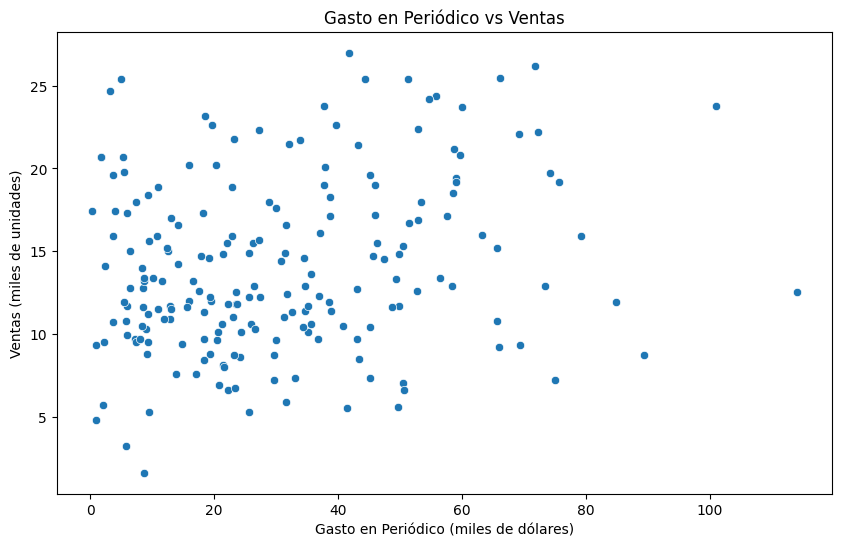

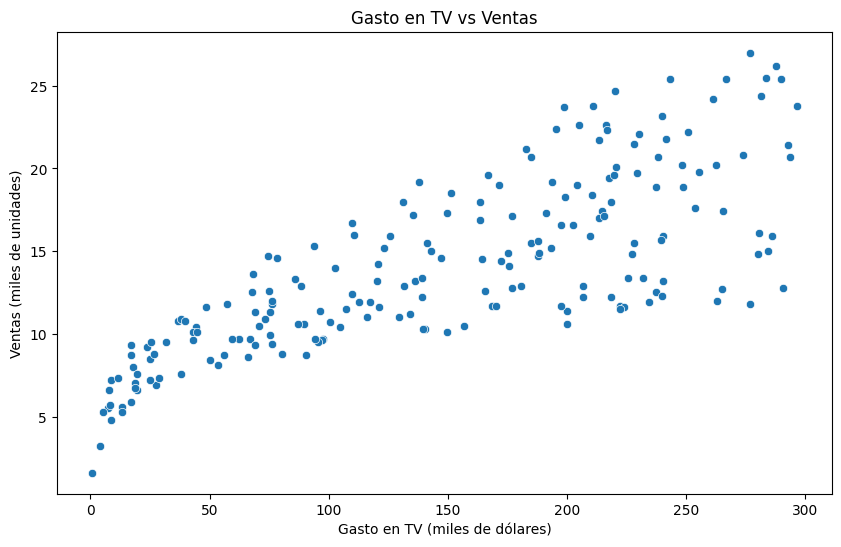

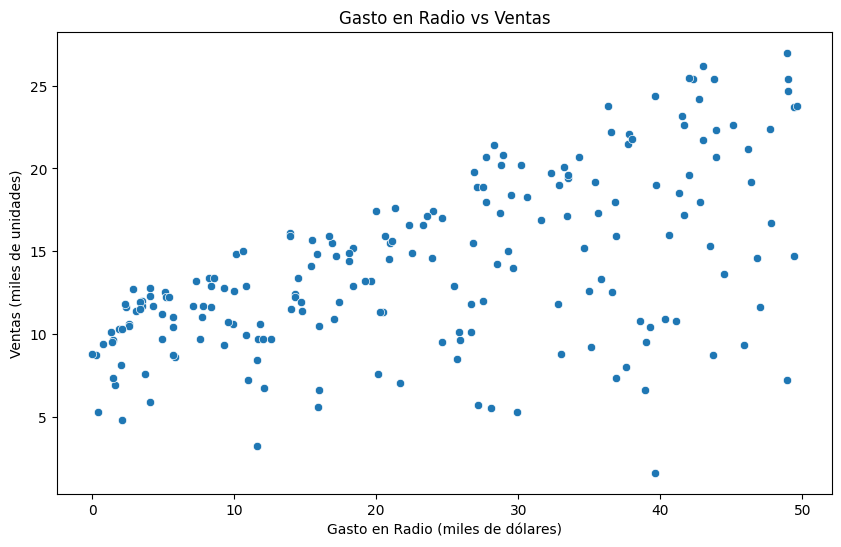

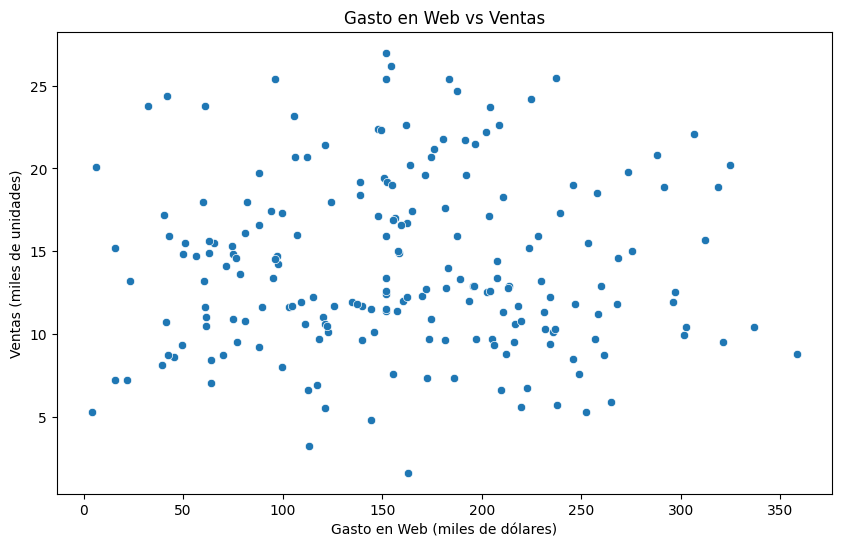

In [199]:
data = pd.read_csv('https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv')
data.head()
# Graficar los datos periodico vs ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Gasto en Periódico vs Ventas')
plt.xlabel('Gasto en Periódico (miles de dólares)')
plt.ylabel('Ventas (miles de unidades)')
plt.show()
# Graficar los datos TV vs ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('Gasto en TV vs Ventas')
plt.xlabel('Gasto en TV (miles de dólares)')
plt.ylabel('Ventas (miles de unidades)')
plt.show()
# Graficar los datos radio vs ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Gasto en Radio vs Ventas')
plt.xlabel('Gasto en Radio (miles de dólares)')
plt.ylabel('Ventas (miles de unidades)')
plt.show()
# Graficar los datos web vs ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Web', y='Sales', data=data)
plt.title('Gasto en Web vs Ventas')
plt.xlabel('Gasto en Web (miles de dólares)')
plt.ylabel('Ventas (miles de unidades)')
plt.show()

2- Exploracion de datos EDA

In [200]:
print("Observaciones y variables: ", data.shape)

Observaciones y variables:  (200, 7)


In [201]:
data.dtypes

Unnamed: 0      int64
X               int64
TV            float64
Radio         float64
Newspaper     float64
Web           float64
Sales         float64
dtype: object

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


Se describen como variables independientes TV, Radio, Newspaper Y Web.

Como variable dependiente Sales.

Variable independientes:
- TV: Costos en publicidad (miles de dolares)
- Radio: Costos de publicidad en radio (miles de dolares)
- Newspaper: Costos publicitarios en periodico (miles de dolares)
- Web: Costos publicitarios en Web (miles de dolares)

3- Limpiar datos


In [203]:
data = data[["TV","Radio","Newspaper","Web","Sales"]]
data.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


4- Entrenamiento y validacion

seed 1279 with (random_state=2022)

Distribucion de datos: 70% Trainning, 30% Validation

In [204]:
X_val, X_train, y_val, y_train = train_test_split(
    data.drop(columns="Sales"),
    data["Sales"],
    test_size=.7
)

In [205]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((140, 4), (60, 4), (140,), (60,))

Parametros

- Max_Depth: Profundidad Maxima
- Min_samples_split: Numero minimo de observaciones que debe detener el nodo para que pueda dividirse. si es un valor decimal se interpreta como la fraccion total de observaciones de entrenaiemto
- Min_samples_leaf: numero minimo de boservaciones que debe tener cada uno de los nodos hijos para que se produzca la division
- Max_leaf_nodes: numero maximo de nodos terminales
- Random_seed: semilla que permite datos reproducibles

In [206]:
modelo_arbol = DecisionTreeRegressor(max_depth=3)

In [207]:
modelo_arbol.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Visualizar el modelo

In [208]:
print("Profundidad del arbol: ", modelo_arbol.get_depth())
print("Numero de nodos terminales: ", modelo_arbol.get_n_leaves())

Profundidad del arbol:  3
Numero de nodos terminales:  8


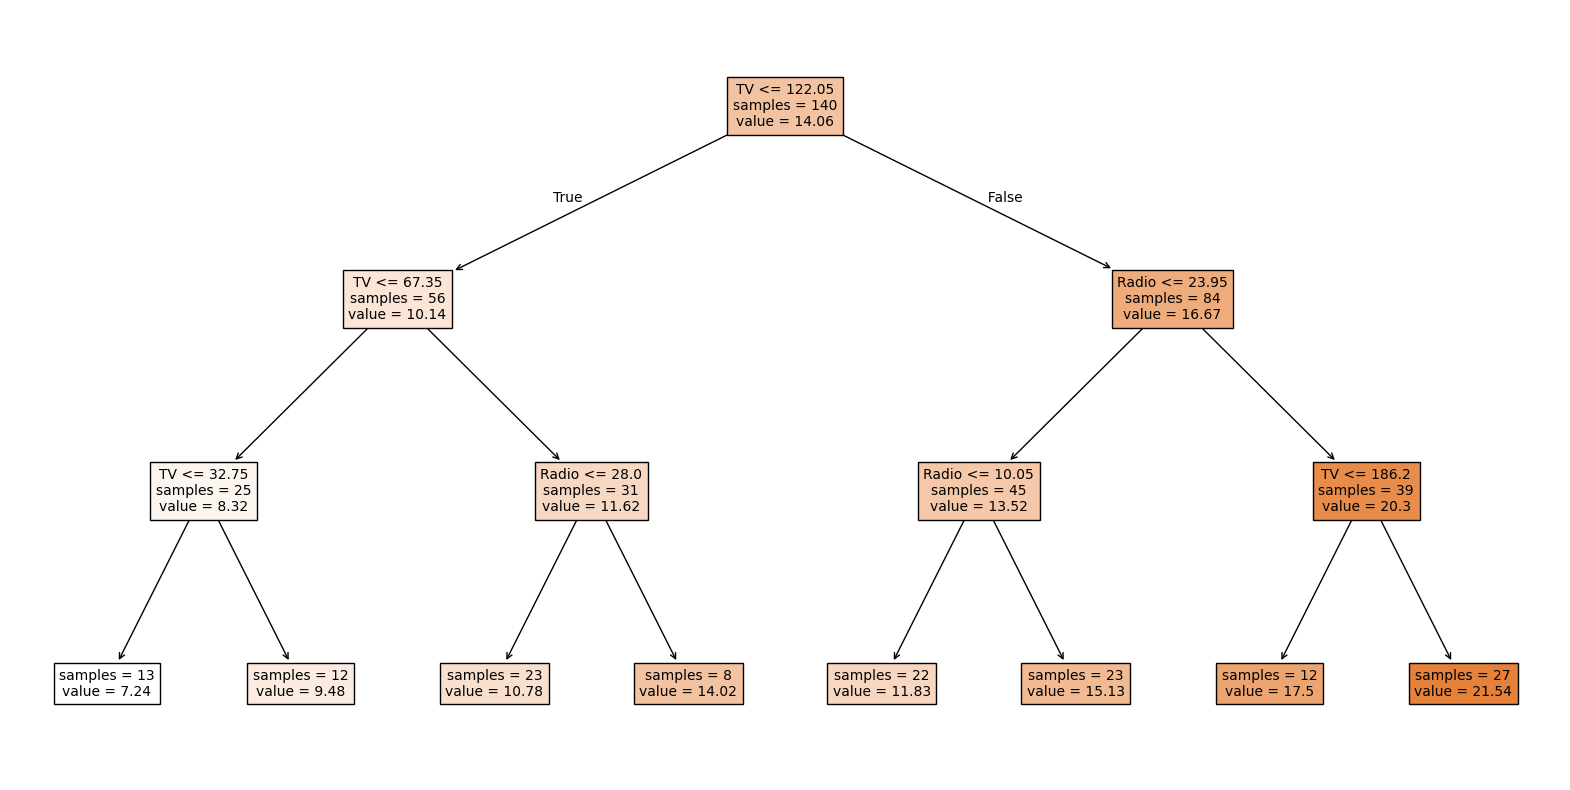

In [209]:
# Graficar el arbol de decision
plt.figure(figsize=(20,10))
plot_tree(modelo_arbol, feature_names=data.drop(columns="Sales").columns, filled=True, impurity=False, fontsize=10, precision=2)
plt.show()

Predicciones

La importancia de cada predictor en el modelo se calcula como la reduccion total (normalizada) en el criterio de division. en este caso, el MSE que consigue el predictor en las divisiones en las que participa. si un predictor no se ha seleccionado en ninguna division, no se incluye en el modelo y su importancia es 0

In [210]:
importancia_predictores = pd.DataFrame({
    'Predictor': data.drop(columns="Sales").columns,
    'Importancia': modelo_arbol.feature_importances_
})

In [211]:
importancia_predictores.sort_values(by='Importancia', ascending=False)

,Predictor,Importancia
0,TV,0.603892
1,Radio,0.396108
2,Newspaper,0.000000
3,Web,0.000000
